# Importing Necessary Libarries and Datasets.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
df_observations = pd.read_csv('observations.csv')
df_species = pd.read_csv('species_info.csv')

## Merging and filtering each conservation status in different subsets

In [14]:
merged_df = pd.merge(df_species, df_observations, on='scientific_name')
filtered_df_conservation_status = merged_df[merged_df['conservation_status'].notna()]
unique_values = filtered_df_conservation_status['category'].unique()
print(unique_values)

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [6]:
grouped = filtered_df_conservation_status.groupby('conservation_status')

# Create a dictionary to hold the subsets
subsets_groupby = {status: group for status, group in grouped}

# Assign each subset to a variable
endangered_subset = subsets_groupby.get('Endangered')
concern_subset = subsets_groupby.get('Species of Concern')
recovery_subset = subsets_groupby.get('In Recovery')
threatned_subset = subsets_groupby.get('Threatened')


## Ploting Conservation Status in each Park

In [ ]:

all_parks = filtered_df_conservation_status['park_name'].unique()

select_parks = all_parks[0:]

park_data = {park: filtered_df_conservation_status[filtered_df_conservation_status['park_name'] == park] for park in select_parks}

# Step 5: Plot the Data
for park, data in park_data.items():
    plt.figure(figsize=(10, 6))
    
    # Aggregate data: Count of conservation statuses
    conservation_counts = data['conservation_status'].value_counts()
    
    # Plotting the counts of conservation statuses
    conservation_counts.plot(kind='bar')
    
    plt.title(f"Conservation Status in {park}")
    plt.xlabel('Conservation Status')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

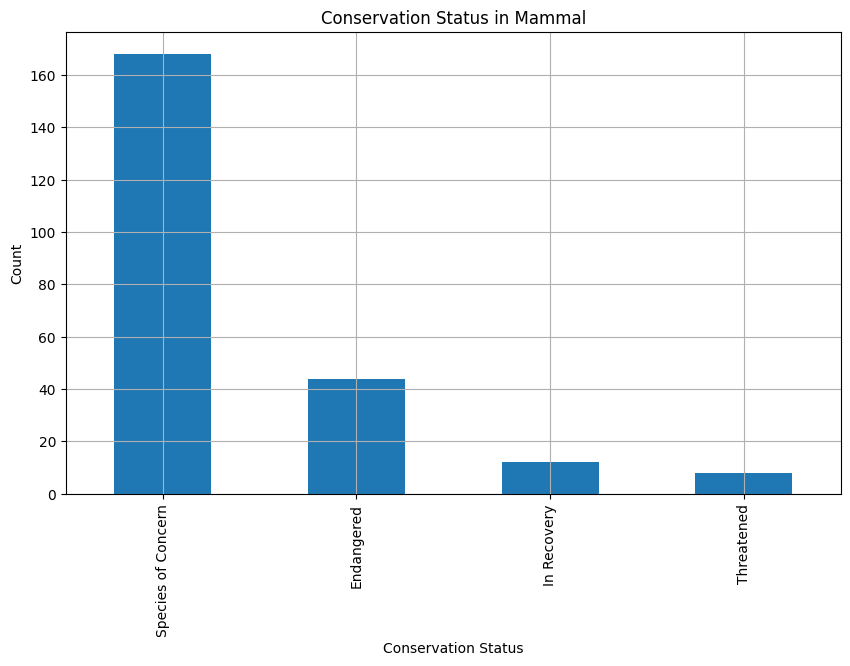

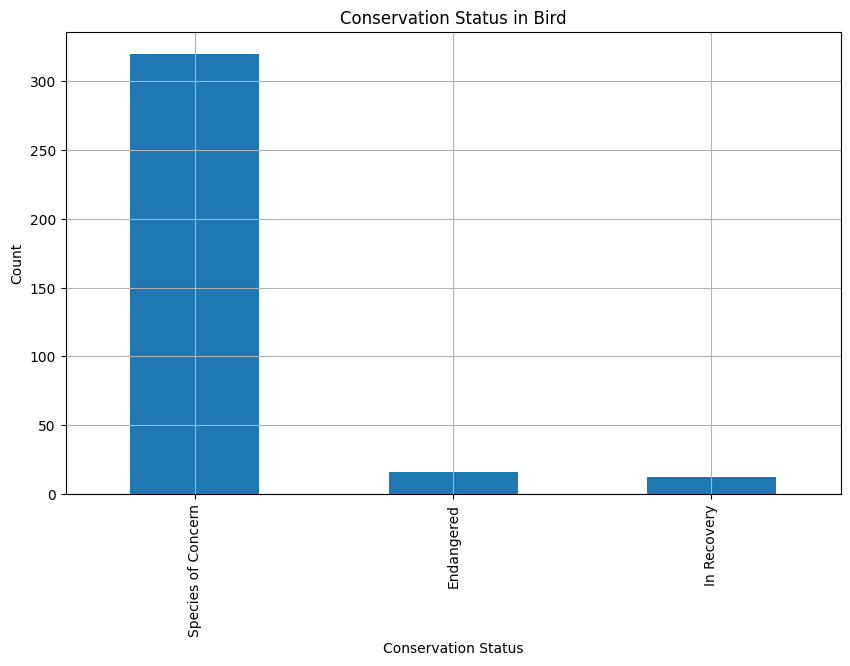

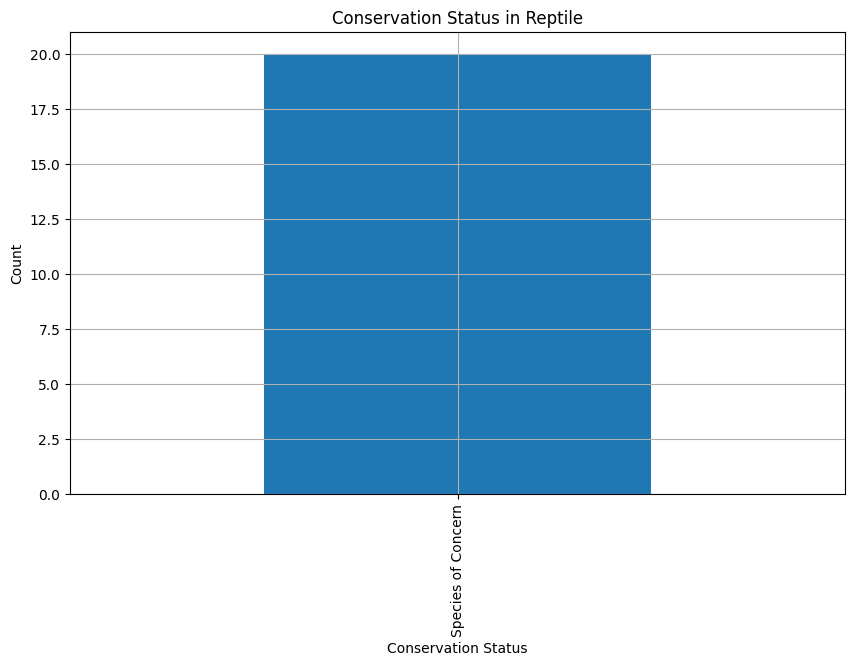

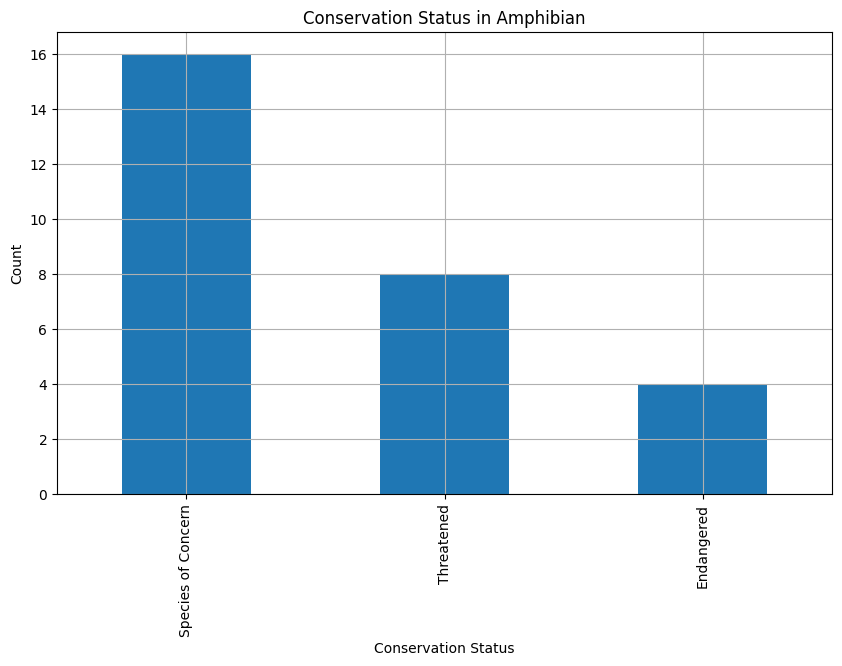

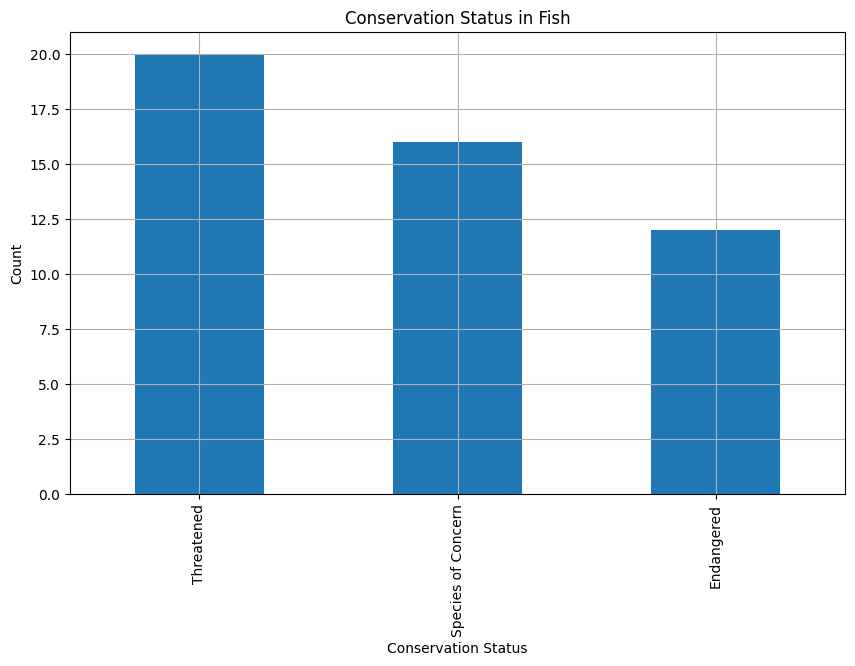

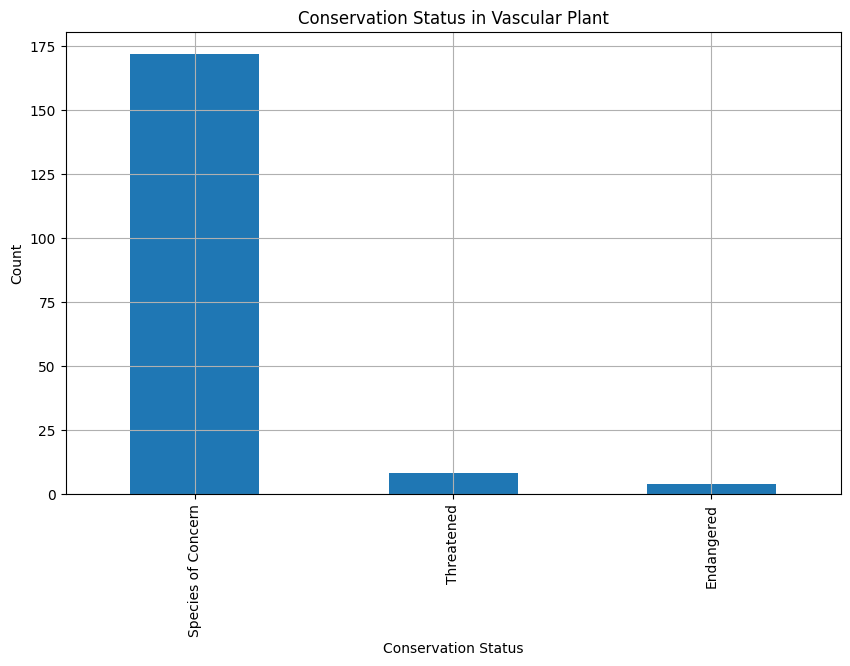

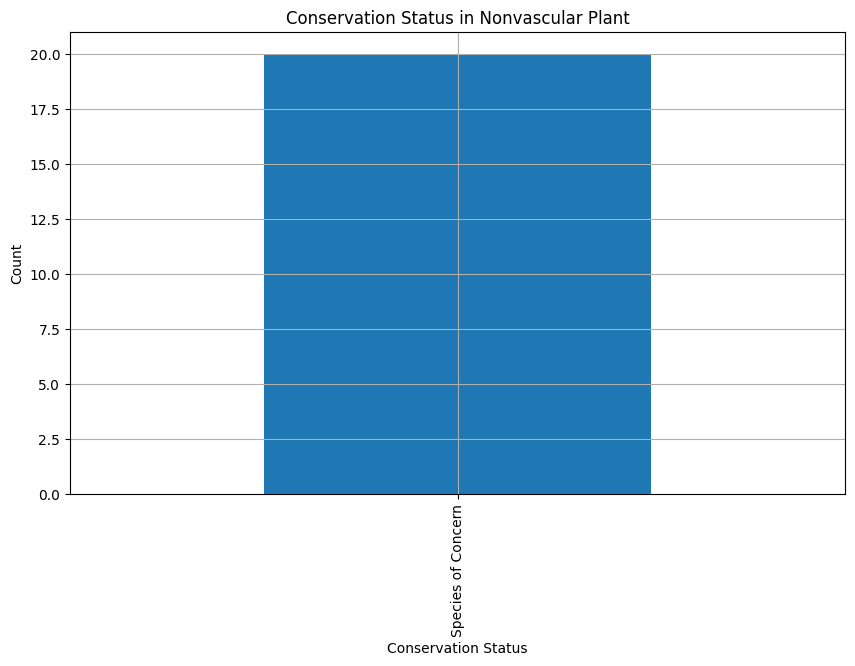

In [16]:
all_categories = filtered_df_conservation_status['category'].unique()

select_category = all_categories[0:]

category_data = {category: filtered_df_conservation_status[filtered_df_conservation_status['category'] == category] for category in select_category}

for category, data in category_data.items():
    plt.figure(figsize=(10, 6))
    
    
    conservation_counts = data['conservation_status'].value_counts()
    
    conservation_counts.plot(kind='bar')
    
    plt.title(f"Conservation Status in {category}")
    plt.xlabel('Conservation Status')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()